In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine


from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [3]:
# ref from 2segp github
# Classification dataset names - choose from following datasets 

CLASS_DATASET_NAMES = ['bcw','heart','iono','parks','sonar']
dataset_name = CLASS_DATASET_NAMES[1]


# Load the dataset
Xy = np.genfromtxt('test_data/'+dataset_name+'.csv', delimiter=',')
X = Xy[:, :-1]
y = Xy[:, -1]   # last column is the label

# simple operators

boost_num = 1000

seed = np.random.randint(9999999)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# model

In [4]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

def initial(y_one_hot):
    init_log_odds = np.sum(y_one_hot,axis=0)/y_one_hot.shape[0]
    
    init_p = np.exp(init_log_odds)
    init_p = init_p/(1+init_p)

    return init_log_odds,init_p

def initial_first_bin(init_log_odds,init_p,X):
    log_odds = np.repeat(init_log_odds,X.shape[0],0)
    p = np.repeat(init_p,X.shape[0],0)
    
    return log_odds,p
    
def update_log_p(grads,log_odds,p,learning_rate):
    log_odds_1 = log_odds + learning_rate * grads
    
    p_1 = np.exp(log_odds_1,where=log_odds_1 < 16,out=np.zeros(log_odds_1.shape)+16)
    p_1 = np.divide(p_1,(1+p_1),where=p_1 < 16,out=np.ones(p_1.shape))
    
    # p_1 = np.exp(log_odds_1)
    # p_1 = np.divide(p_1,(1+p_1))

    return log_odds_1,p_1

def predict(X,init_log_odds,init_p,learning_rate,stack):
    log_odds,p = initial_first_bin(init_log_odds,init_p,X)

    for node in stack:
        grads = node.predict_grad(X)
        
        log_odds,p = update_log_p(grads,log_odds,p,learning_rate)
    return p

In [5]:
train_acc = []
test_acc = []

stack = []

y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

init_log_odds,init_p = initial(y_train_one_hot)
log_odds,p = initial_first_bin(init_log_odds,init_p,X_train)

test_log_odds,test_p = initial_first_bin(init_log_odds,init_p,X_test)

In [87]:
learning_rate = 0.1
bins = 2
lam = 3
stack = []
losses = []
num_features = X_train.shape[1]

max_depth = 5
tolerance = 0.04


total_size = 10
elite_size = 10

eg = Engine(Functions.simple_opset,X_train,y_train,y_train_one_hot,learning_rate,bins,max_depth,lam)
eg.initialize_nodes(log_odds,p)
origin_features = eg.nodes.copy()
origin_losses = eg.losses.copy()
stack.extend(eg.nodes)
losses.extend(origin_losses)

for i in range(100):
    for j in range(6):
        eg.evolve(total_size,elite_size,log_odds=log_odds,p=p,tolerance=tolerance,verbose=0)
    stack,losses = eg.adding_unique_node(stack,losses,eg.nodes[num_features:],tolerance=tolerance)
    eg.nodes = origin_features.copy()
    eg.losses = origin_losses.copy()
    print(len(stack),sum([n.numNode for n in stack]),i)
    # if len(stack) > 8000:
    #         break


19 33 0
20 38 1
22 48 2
23 53 3
24 56 4
24 56 5
24 54 6
24 54 7
24 54 8
24 54 9
24 54 10
24 54 11
25 59 12
26 64 13
26 64 14
26 62 15
28 86 16
28 86 17
28 86 18
28 86 19
28 76 20
28 76 21
28 76 22
28 76 23
28 74 24
29 75 25
29 75 26
29 75 27
29 75 28
29 75 29
29 73 30
29 73 31
29 73 32
29 73 33
29 73 34
29 73 35
29 73 36
29 73 37
29 73 38
29 73 39
29 73 40
29 73 41
29 73 42
29 73 43
29 73 44
29 73 45
29 73 46
29 73 47
29 73 48
29 73 49
31 89 50
31 89 51
31 89 52
31 89 53
31 85 54
31 85 55
31 85 56
31 85 57
31 85 58
31 85 59
31 85 60
31 83 61
32 90 62
32 88 63
32 86 64
32 86 65
32 86 66
33 91 67
33 91 68
33 89 69
33 89 70
33 89 71
33 89 72
33 89 73
33 89 74
33 89 75
33 89 76
34 102 77
34 100 78
34 90 79
34 90 80
34 90 81
34 90 82
34 90 83
34 90 84
34 90 85
34 90 86
34 86 87
34 86 88
34 86 89
35 91 90
35 91 91
35 91 92
35 91 93
35 91 94
36 96 95
36 94 96
37 99 97
37 97 98
37 97 99


0.8994708994708994 0.8271604938271605 0.8271604938271605
42.01894334144552 21.445903234252853 21.445903234252853
0.9153439153439153 0.8271604938271605 0.8271604938271605
29.798271715179926 18.344392256880692 18.344392256880692
0.9417989417989417 0.8271604938271605 0.8271604938271605
23.416754018112584 17.530160655207492 17.530160655207492


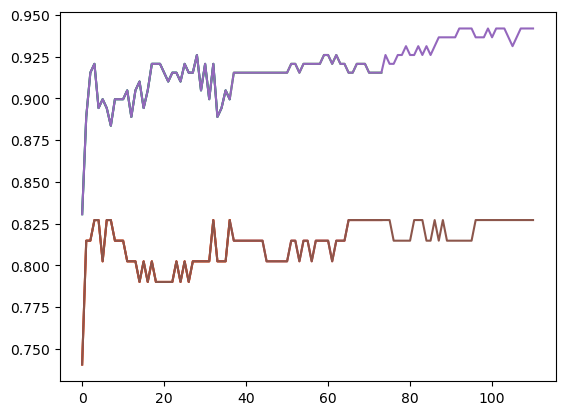

In [91]:
def training_data(node,y_train_one_hot,log_odds,p,test_log_odds=None,test_p=None):
    grads = node.estimator.set_grads_bin(y_train_one_hot-p,p)
    log_odds,p = update_log_p(grads,log_odds,p,learning_rate)

    if test_log_odds != None:
        test_grads = node.predict_grad(X_test)
        test_log_odds,test_p = update_log_p(test_grads,test_log_odds,test_p,learning_rate)

        return log_odds,p,test_log_odds,test_p
    
    return log_odds,p

def get_order(stack,y_train_one_hot,log_odds,p,previous_sse):
    score = []
    
    for node in stack:
        log_odds,p = training_data(node,y_train_one_hot,log_odds,p)
        
        sse = np.sum(np.power(y_train_one_hot - p,2))
        score.append(previous_sse - sse)
        previous_sse = sse
    
    return [stack[i] for i in np.argsort(score)[::-1]]

y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

fits = [i.estimator.loss for i in stack]
a = [stack[i] for i in np.argsort(fits)]

log_odds,p = initial_first_bin(init_log_odds,init_p,X_train)
test_log_odds,test_p = initial_first_bin(init_log_odds,init_p,X_test)

# a = get_order(a,y_train_one_hot,log_odds,p,previous_sse=np.sum(np.power(y_train_one_hot - p,2)))

train_acc = []
test_acc = []

train_sse = []
test_sse = []


counts = []

for _ in range(3):
    score = []
    
    for i,node in enumerate(a):
        # node.estimator.lam = 300
        grads = node.estimator.set_grads_bin(y_train_one_hot-p,p)
        log_odds,p = update_log_p(grads,log_odds,p,learning_rate)

        test_grads = node.predict_grad(X_test)
        test_log_odds,test_p = update_log_p(test_grads,test_log_odds,test_p,learning_rate)


        train_sse.append(np.sum(np.power(y_train_one_hot - p,2)))
        test_sse.append(np.sum(np.power(y_test_one_hot - test_p,2)))
        # score.append(previous_sse - train_sse[-1])
        # previous_sse = train_sse[-1]


        pred = np.argmax(p,axis=1)
        train_acc.append(accuracy_score(pred,y_train))
        test_pred = np.argmax(test_p,axis=1)
        test_acc.append(accuracy_score(test_pred,y_test))
    
    # a = [a[i] for i in np.argsort(score)[::-1]]

    plt.plot(train_acc)
    plt.plot(test_acc)
    print(train_acc[-1],test_acc[-1],max(test_acc))

    # plt.plot(train_sse)
    # plt.plot(test_sse)
    print(train_sse[-1],test_sse[-1],min(test_sse))

    # plt.legend(["train","test"])
    # plt.show()
    

In [92]:
sum([n.numNode for n in stack])

97

              precision    recall  f1-score   support

           0    0.93269   0.96040   0.94634       101
           1    0.95294   0.92045   0.93642        88

    accuracy                        0.94180       189
   macro avg    0.94282   0.94043   0.94138       189
weighted avg    0.94212   0.94180   0.94172       189

              precision    recall  f1-score   support

           0    0.85714   0.85714   0.85714        49
           1    0.78125   0.78125   0.78125        32

    accuracy                        0.82716        81
   macro avg    0.81920   0.81920   0.81920        81
weighted avg    0.82716   0.82716   0.82716        81



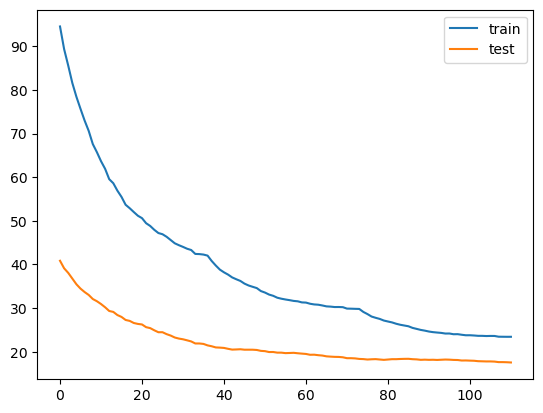

In [93]:
plt.plot(train_sse)
plt.plot(test_sse)
plt.legend(["train","test"])    
print(classification_report(y_train,np.argmax(p,axis=1),digits=5))
print(classification_report(y_test,np.argmax(test_p,axis=1),digits=5))

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

print(classification_report(y_train,clf.predict(X_train)))
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        88

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        49
           1       0.74      0.88      0.80        32

    accuracy                           0.83        81
   macro avg       0.82      0.84      0.82        81
weighted avg       0.84      0.83      0.83        81



# XGBoost

In [44]:
import xgboost


In [45]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

print(classification_report(y_train,xgb.predict(X_train),digits=5))
print(classification_report(y_test,xgb.predict(X_test),digits=5))
print("train:",np.sum(np.power(y_train_one_hot - xgb.predict_proba(X_train),2)))
print("test:",np.sum(np.power(y_test_one_hot - xgb.predict_proba(X_test),2)))

import json

def item_generator(json_input, lookup_key):
    if isinstance(json_input, dict):
        for k, v in json_input.items():
            if k == lookup_key:
                yield v
            else:
                yield from item_generator(v, lookup_key)
    elif isinstance(json_input, list):
        for item in json_input:
            yield from item_generator(item, lookup_key)

def tree_depth(json_text):
    json_input = json.loads(json_text)
    depths = list(item_generator(json_input, 'depth'))
    return max(depths) + 1 if len(depths) != 0 else 1


booster = xgb.get_booster()

tree_df = booster.trees_to_dataframe()
depths = [tree_depth(x) for x in booster.get_dump(dump_format = "json")]
len(depths),np.average(depths),len(tree_df)

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       101
           1    1.00000   1.00000   1.00000        88

    accuracy                        1.00000       189
   macro avg    1.00000   1.00000   1.00000       189
weighted avg    1.00000   1.00000   1.00000       189

              precision    recall  f1-score   support

           0    0.89583   0.87755   0.88660        49
           1    0.81818   0.84375   0.83077        32

    accuracy                        0.86420        81
   macro avg    0.85701   0.86065   0.85868        81
weighted avg    0.86516   0.86420   0.86454        81

train: 0.8205863323159309
test: 18.64404417127231


(100, 3.65, 1314)

# GDBT

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)

print(classification_report(y_train,clf.predict(X_train),digits=5))
print(classification_report(y_test,clf.predict(X_test),digits=5))
print("train:",np.sum(np.power(y_train_one_hot - clf.predict_proba(X_train),2)))
print("test:",np.sum(np.power(y_test_one_hot - clf.predict_proba(X_test),2)))

len(clf.estimators_),sum([ est.tree_.node_count for ests in clf.estimators_ for est in ests])

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       101
           1    1.00000   1.00000   1.00000        88

    accuracy                        1.00000       189
   macro avg    1.00000   1.00000   1.00000       189
weighted avg    1.00000   1.00000   1.00000       189

              precision    recall  f1-score   support

           0    0.91111   0.83673   0.87234        49
           1    0.77778   0.87500   0.82353        32

    accuracy                        0.85185        81
   macro avg    0.84444   0.85587   0.84793        81
weighted avg    0.85844   0.85185   0.85306        81

train: 3.7666358053793276
test: 16.7109547748185


(100, 1398)